In [5]:
import numpy as np
import pandas as pd
import h5py
import torch
import matplotlib.pyplot as plt

In [6]:
df_training = pd.read_hdf('./NSubjetiness_TopData/train_subjettiness.h5', key='table')
keys = df_training.keys()

In [7]:
mean_values = []
std_values = []
for k in range(27):
    mean_values.append(np.mean(df_training[keys[k]]))
    std_values.append(np.std(df_training[keys[k]]))
    df_training[keys[k]] = (df_training[keys[k]] - np.mean(df_training[keys[k]])) / np.std(df_training[keys[k]])

In [ ]:
for i in range(len(df_training)):
    if(i % 50000 == 0):
        print(i / len(df_training) * 100)
    for j in range(len(keys)):
        if not df_training.iloc[i][j] == df_training.iloc[i][j]:
            print("yes", i, j)
            df_training.drop(df.index[i], inplace=True)

In [8]:
df_training.drop(df_training.index[456856], inplace=True)

In [9]:
print(keys)

Index(['1_subjettiness_0.5', '1_subjettiness_1.0', '1_subjettiness_2.0',
       '2_subjettiness_0.5', '2_subjettiness_1.0', '2_subjettiness_2.0',
       '3_subjettiness_0.5', '3_subjettiness_1.0', '3_subjettiness_2.0',
       '4_subjettiness_0.5', '4_subjettiness_1.0', '4_subjettiness_2.0',
       '5_subjettiness_0.5', '5_subjettiness_1.0', '5_subjettiness_2.0',
       '6_subjettiness_0.5', '6_subjettiness_1.0', '6_subjettiness_2.0',
       '7_subjettiness_0.5', '7_subjettiness_1.0', '7_subjettiness_2.0',
       '8_subjettiness_0.5', '8_subjettiness_1.0', '8_subjettiness_2.0', 'm',
       'pT', 'truthE', 'truthPX', 'truthPY', 'truthPZ', 'ttv',
       'is_signal_new'],
      dtype='object')


In [10]:
input_vec = df_training[keys[0:-7]]
training_input = torch.tensor(input_vec.values)
labels = df_training[keys[-1]]
training_labels = torch.tensor(labels.values)
torch.reshape(training_labels, (len(training_labels), 1))

torch.Size([1209789, 25])


In [18]:
model = torch.nn.Sequential(
    torch.nn.Linear(25, 50),
    torch.nn.Sigmoid(),
    torch.nn.Linear(50, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()

In [19]:
learning_rate = 0.01
epochs = 500

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

0 0.7613349556922913
50 0.5236733555793762
100 0.4591508209705353
150 0.4175248146057129
200 0.3883463740348816
250 0.3672076165676117
300 0.351462721824646
350 0.3394395709037781
400 0.330054372549057
450 0.3225862681865692


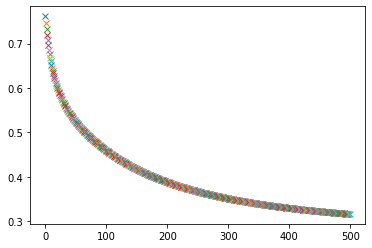

In [20]:
for e in range(epochs):
    label_pred = model(training_input)
    loss = loss_fn(label_pred, training_labels.reshape(-1, 1))
    plt.plot(e, loss.item(), "x")
    if e % 50 == 0:
        print(e, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
plt.show()